/Users/tfc/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/tfc/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/tfc/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be av

[-0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.2727272727272727, -0.1340909090909091, -0.22954545454545455, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.27954545454545454, -0.12045454545454545, -0.11363636363636363, -0.12954545454545455, -0.2909090909090909, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.32272727272727275, -0.2772727272727273, -0.12954545454545455, -0.10227272727272728, -0.10681818181818181, -0.1681818181

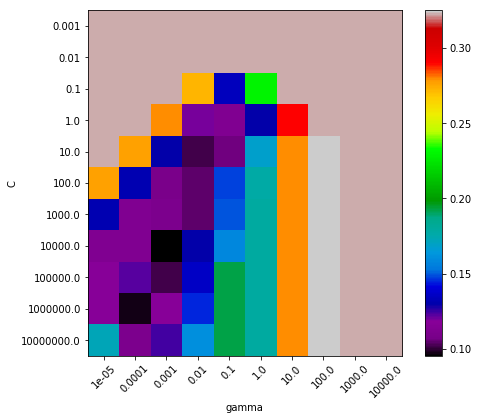

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse
import sklearn.linear_model as lm 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler



df_svm = pd.read_csv('wholesale-customers.csv', sep=',')
df_svm.head()

X_svm = df_svm.drop(columns = ["Channel"])

#X_svm = preprocessing.Scaler(X_svm)
y_svm = df_svm["Channel"]

from sklearn import svm, grid_search
def svc_param_selection(X, y, nfolds):
    X_train, X_test, y_train, y_test =train_test_split(X, y , test_size=0.3)

scaler = StandardScaler()
X_svm = scaler.fit_transform(X_svm)    
    

#Cs = np.logspace(-3, 8, 10)
Cs = 10. ** np.arange(-3,8)
g = np.logspace(-5, 4, 10)
#tols = [0.001, 0.01, 0.1, 1]

cv = svc_param_selection(X_svm,y_svm,5)
param_grid = {'C': Cs ,'gamma' : g}
grid_search = GridSearchCV(SVC(), param_grid, scoring = "neg_mean_squared_error",cv=cv)
grid_search.fit(X_svm, y_svm)
grid_search.best_params_

score = grid_search.grid_scores_
scores = [x[1] for x in score]

print(scores)

##### TAKE A LOOK AT THIS
scores = abs(np.array(scores).reshape(len(Cs), len(g)))

print(grid_search.best_params_)
pl.figure(figsize=(8, 6))
pl.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
pl.imshow(scores, interpolation='nearest', cmap=pl.cm.spectral)
pl.xlabel('gamma')
pl.ylabel('C')
pl.colorbar()
pl.xticks(np.arange(len(g)), g, rotation=45)
pl.yticks(np.arange(len(Cs)), Cs)
pl.show()